# Car Insurance Fraud Analysis using Explanatory Model Analysis (Model Agnostic)

# Import Data

## Library

In [ ]:
!pip install skope-rules
!pip install eli5
!pip install scikit-plot
!pip install shap
!pip install lime
!pip install dalex

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

import warnings
warnings.filterwarnings('ignore')

# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot, seaborn, and plotly.express module for data visualization
import matplotlib.pyplot as plt
palette = {0: 'tab:blue',1: 'tab:orange'}
import seaborn as sns
import plotly.express as px

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# load k nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# load tree visualization
from sklearn.tree import plot_tree, export_text
# load metrics
from sklearn.metrics import *
# load grid search
from sklearn.model_selection import GridSearchCV

# import xgboost classifier
from xgboost import XGBClassifier

# load preprocessing module
from sklearn.preprocessing import *

# load rulefit model
from skrules import SkopeRules

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load eli5
import eli5

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer 

# import dalex to explain complex model
import dalex as dx

## Load Data & Profilling

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dhykac/Car_Insurance_Fraud_Analysis/main/insuranceFraud.csv')
df.head(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       10/17/2014           OH   
1                 228   42         342868        6/27/2006           IN   
2                 134   29         687698         9/6/2000           OH   
3                 256   41         227811        5/25/1990           IL   
4                 228   44         367455         6/6/2014           IL   
5                 256   39         104594       10/12/2006           OH   
6                 137   34         413978         6/4/2000           IN   
7                 165   37         429027         2/3/1990           IL   
8                  27   33         485665         2/5/1997           IL   
9                 212   42         636550        7/25/2011           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   
5    250/500               1000                1351.10               0   
6    250/500               1000                1333.35               0   
7    100/300               1000                1137.03               0   
8    100/300                500                1442.99               0   
9    100/300                500                1315.68               0   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   
5       478456  ...         2                      NO              64100   
6       441716  ...         0                       ?              78650   
7       603195  ...         2                     YES              51590   
8       601734  ...         1                     YES              27700   
9       600983  ...         1                       ?              42300   

  injury_claim property_claim  vehicle_claim  auto_make  auto_model auto_year  \
0         6510          13020          52080       Saab         92x      2004   
1          780            780           3510   Mercedes        E400      2007   
2         7700           3850          23100      Dodge         RAM      2007   
3         6340           6340          50720  Chevrolet       Tahoe      2014   
4         1300            650           4550     Accura         RSX      2009   
5         6410           6410          51280       Saab          95      2003   
6        21450           7150          50050     Nissan  Pathfinder      2012   
7         9380           9380          32830       Audi          A5      2015   
8         2770           2770          22160     Toyota       Camry      2012   
9         4700           4700          32900       Saab         92x      1996   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  
5              Y  
6              N  
7              N  
8              N  
9              N  

[10 rows x 39 columns]

In [ ]:
# Data Profilling
print("="*10,"Data Profilling","="*10)

# Data Shape
print("Data shape :", df.shape)
print("")

# Data Info
print("Data info :")
print(df.info())
print("")

# Data duplication
print("Data duplication :")
print(df.duplicated().sum())
print("")

========== Data Profilling ==========
Data shape : (1000, 39)

Data info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  in

In [ ]:
columns_name =[]
unique_value=[]
# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        columns_name.append(str(col)) 
        unique_value.append(df[col].nunique())
table= pd.DataFrame()
table['Columns'] = columns_name
table['Unique']= unique_value
            
table=table.sort_values('Unique',ascending=False)
table

Columns  Unique
15        incident_location    1000
0          policy_bind_date     951
8             incident_date      60
19               auto_model      39
6           insured_hobbies      20
18                auto_make      14
5        insured_occupation      14
4   insured_education_level       7
14            incident_city       7
13           incident_state       7
7      insured_relationship       6
12    authorities_contacted       5
10           collision_type       4
11        incident_severity       4
9             incident_type       4
1              policy_state       3
16          property_damage       3
17  police_report_available       3
2                policy_csl       3
3               insured_sex       2
20           fraud_reported       2

In [ ]:
# Unique value for object column
obj_col = ['incident_location', 'policy_bind_date', 'incident_date',
       'auto_model', 'insured_hobbies', 'auto_make', 'insured_occupation',
       'insured_education_level', 'incident_city', 'incident_state',
       'insured_relationship', 'authorities_contacted', 'collision_type',
       'incident_severity', 'incident_type', 'policy_state',
       'property_damage', 'police_report_available', 'policy_csl',
       'insured_sex', 'fraud_reported']
for col in obj_col:
    print("="*80)
    print(f"Column: {col}")
    print(df[col].unique())

Column: incident_location
['9935 4th Drive' '6608 MLK Hwy' '7121 Francis Lane' '6956 Maple Drive'
 '3041 3rd Ave' '8973 Washington St' '5846 Weaver Drive' '3525 3rd Hwy'
 '4872 Rock Ridge' '3066 Francis Ave' '1558 1st Ridge' '5971 5th Hwy'
 '6655 5th Drive' '6582 Elm Lane' '6851 3rd Drive' '9573 Weaver Ave'
 '5074 3rd St' '4546 Tree St' '3842 Solo Ridge' '8101 3rd Ridge'
 '5380 Pine St' '8957 Weaver Drive' '2526 Embaracadero Ave'
 '5667 4th Drive' '2502 Apache Hwy' '3418 Texas Lane' '2533 Elm St'
 '3790 Andromedia Hwy' '3220 Rock Drive' '2100 Francis Drive'
 '4687 5th Drive' '9038 2nd Lane' '6092 5th Ave' '8353 Britain Ridge'
 '3540 Maple St' '3104 Sky Drive' '4981 Weaver St' '6676 Tree Lane'
 '3930 Embaracadero St' '3422 Flute St' '4862 Lincoln Hwy' '5719 2nd Lane'
 '3221 Solo Ridge' '6660 MLK Drive' '1699 Oak Drive' '4234 Cherokee Lane'
 '7476 4th St' '8907 Tree Ave' '6619 Flute Ave' '6011 Britain St'
 '5104 Francis Drive' '2280 4th Ave' '2644 Elm Drive' '7466 MLK Ridge'
 '5821 2nd S

* `Incident Location` column have unique value for all rows. In this case, we need to drop this column
* `policy_bind_date` and `incident_date` columns need to be take down, consider date column not likely have significant impact on predicting if a claim is fraud or not
* There are 0 columns of null values, however, we found that there are columns with `?` (question mark) values on the dataset. So we consider this as a missing values
* There are no duplicated values on this data

# Feature Engineering & Selection

## Missing Value handling

Refer from the profilling section, we know that there are columns with the `?` values. We will consider this as a missing values. Fortunately, the real NaN values didn't occur on this dataset.

In [ ]:
# Count question marks value on dataframe

columns_name =[]
qm_values=[]
# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        columns_name.append(str(col)) 
        qm_values.append((df[col].values == '?').sum())
table= pd.DataFrame()
table['Columns'] = columns_name
table['QuestionMarks']= qm_values
            
table=table.sort_values('QuestionMarks',ascending=False)
table

Columns  QuestionMarks
16          property_damage            360
17  police_report_available            343
10           collision_type            178
11        incident_severity              0
19               auto_model              0
18                auto_make              0
15        incident_location              0
14            incident_city              0
13           incident_state              0
12    authorities_contacted              0
0          policy_bind_date              0
1              policy_state              0
9             incident_type              0
8             incident_date              0
7      insured_relationship              0
6           insured_hobbies              0
5        insured_occupation              0
4   insured_education_level              0
3               insured_sex              0
2                policy_csl              0
20           fraud_reported              0

From the summary above, we found that there are three columns with `?` values : `property_damage`, `police_report_available`, `collision_type`. For these, we will treat them with different methods basic on metadata knowledge.

In [ ]:
# Checking unique on qm columns
qm_columns = ['property_damage', 'police_report_available', 'collision_type']

for col in qm_columns:
    print("="*10)
    print(f"Column: {col}")
    print(df[col].unique())

Column: property_damage
['YES' '?' 'NO']
Column: police_report_available
['YES' '?' 'NO']
Column: collision_type
['Side Collision' '?' 'Rear Collision' 'Front Collision']


For `property_damage`, we can replace `?` values with `YES` if `incident_severity` is `Major Damage` or `Total Loss`, and `NO` for `Trivial Damage` or `Trivial Damage`.

In [ ]:
# Check incident severity
check_damage_df = df[df['property_damage'] == '?']
check_damage_df[['property_damage','incident_severity']]

property_damage incident_severity
1                 ?      Minor Damage
3                 ?      Major Damage
6                 ?      Minor Damage
7                 ?        Total Loss
16                ?      Major Damage
..              ...               ...
993               ?        Total Loss
994               ?      Minor Damage
997               ?      Minor Damage
998               ?      Major Damage
999               ?      Minor Damage

[360 rows x 2 columns]

In [ ]:
# Change to YES for Total Loss or Major Damage, NO for other severity

df.loc[df['incident_severity'] == 'Total Loss', 'property_damage'] = 'YES'
df.loc[df['incident_severity'] == 'Major Damage', 'property_damage'] = 'YES'
df.loc[df['property_damage'] == '?', 'property_damage'] = 'NO'

In [ ]:
# Check replaced values on rows 1,3,6,7
df[['property_damage','incident_severity']].head(10)

property_damage incident_severity
0             YES      Major Damage
1              NO      Minor Damage
2              NO      Minor Damage
3             YES      Major Damage
4              NO      Minor Damage
5             YES      Major Damage
6              NO      Minor Damage
7             YES        Total Loss
8             YES        Total Loss
9             YES        Total Loss

For `police_report_available`, we can replace `?` values with `YES` if `authorities_contacted` values is `Police`, and `NO` for the other authorities contacted. 

In [ ]:
# Check if the contacted authorities is Police
check_police_df = df[df['police_report_available'] == '?']
check_police_df[['police_report_available','authorities_contacted']]

police_report_available authorities_contacted
1                         ?                Police
6                         ?                Police
9                         ?                 Other
10                        ?                Police
20                        ?                Police
..                      ...                   ...
989                       ?                Police
993                       ?                 Other
995                       ?                  Fire
996                       ?                  Fire
999                       ?                Police

[343 rows x 2 columns]

In [ ]:
# Change to YES if Police contacted, NO if other authorities contacted

df.loc[df['authorities_contacted'] == 'Police', 'police_report_available'] = 'YES'
df.loc[df['authorities_contacted'] != 'Police', 'police_report_available'] = 'NO'

In [ ]:
# Check replaced values on rows 1, 6, 9, 10
df[['police_report_available','authorities_contacted']].head(11)

police_report_available authorities_contacted
0                      YES                Police
1                      YES                Police
2                      YES                Police
3                      YES                Police
4                       NO                  None
5                       NO                  Fire
6                      YES                Police
7                      YES                Police
8                      YES                Police
9                       NO                 Other
10                     YES                Police

For `collision_type`, we can simply change `?` with `No Collision`. Consider that collision usually occur on only three place : Front, Rear, and Side.

In [ ]:
# Check ? values collision type

check_collision_df = df[df['collision_type'] == '?']
check_collision_df['collision_type']

1      ?
4      ?
13     ?
26     ?
27     ?
      ..
964    ?
969    ?
983    ?
994    ?
999    ?
Name: collision_type, Length: 178, dtype: object

In [ ]:
# Change ? with No Collisiong

df.loc[df['collision_type'] == '?', 'collision_type'] = 'No Collision'

In [ ]:
# Check replaced values on row 1,4,13
df['collision_type'].head(15)

0      Side Collision
1        No Collision
2      Rear Collision
3     Front Collision
4        No Collision
5      Rear Collision
6     Front Collision
7     Front Collision
8     Front Collision
9      Rear Collision
10    Front Collision
11    Front Collision
12     Rear Collision
13       No Collision
14     Rear Collision
Name: collision_type, dtype: object

Now, we check the dataframe if there are more question mark values

In [ ]:
# Count question marks value on dataframe

columns_name =[]
qm_values=[]
# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        columns_name.append(str(col)) 
        qm_values.append((df[col].values == '?').sum())
table= pd.DataFrame()
table['Columns'] = columns_name
table['QuestionMarks']= qm_values
            
table=table.sort_values('QuestionMarks',ascending=False)
table

Columns  QuestionMarks
0          policy_bind_date              0
11        incident_severity              0
19               auto_model              0
18                auto_make              0
17  police_report_available              0
16          property_damage              0
15        incident_location              0
14            incident_city              0
13           incident_state              0
12    authorities_contacted              0
10           collision_type              0
1              policy_state              0
9             incident_type              0
8             incident_date              0
7      insured_relationship              0
6           insured_hobbies              0
5        insured_occupation              0
4   insured_education_level              0
3               insured_sex              0
2                policy_csl              0
20           fraud_reported              0

In [ ]:
# Checking unique on qm columns
qm_columns = ['property_damage', 'police_report_available', 'collision_type']

for col in qm_columns:
    print("="*10)
    print(f"Column: {col}")
    print(df[col].unique())

Column: property_damage
['YES' 'NO']
Column: police_report_available
['YES' 'NO']
Column: collision_type
['Side Collision' 'No Collision' 'Rear Collision' 'Front Collision']


Great! All question marks has been replaced with proper values

## Marital related transformation

The reason why we need to include marital status is because if the insured have a family (either spouse or child), the insured tends to be careful since they have someone to take care of.

In [ ]:
# Check relationship unique values
df['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [ ]:
# Change Husband, Wife, and Own-Child to married
# Unmarried, Not-In-Family, and Other-Relative to single

df['insured_relationship'] = df['insured_relationship'].replace({'husband': 'Married',
                                                           'wife': 'Married',
                                                           'own-child': 'Married',
                                                           'unmarried': 'Single', 
                                                           'not-in-family': 'Single',
                                                           'other-relative': 'Single'})

## Education levels related transformation

Next is education, we need to include the education levels because higher the education the insured most likely careful because more educated their background the more the will concern about traffic rules or else.

In [ ]:
# Check Education unique values
df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [ ]:
# Change High School, College, Associate to First since First Cycle
# Masters, MD, JD to Second since Second Cycle
# PhD to Third since Third Cycle

df['insured_education_level'] = df['insured_education_level'].replace({'High School': 'First',
                                                           'College': 'First',
                                                           'Associate': 'First',
                                                           'Masters': 'Second', 
                                                           'JD': 'Second',
                                                           'MD': 'Second',
                                                           'PhD': 'Third'})

## Hobbies related transformation

Somehow, sporty hobbies will make insured tends to be healthy and fit if driving on the road.

In [ ]:
# Check hobbies unique values
df['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [ ]:
# Make a list based on sport
sport = ['bungie-jumping', 'base-jumping', 'golf', 'camping', 'skydiving', 'hiking', 'paintball', 'chess', 'kayaking', 'polo', 'basketball', 'cross-fit', 'exercise']

In [ ]:
# Change the values into related hobbies
df['insured_hobbies'] = np.where(df['insured_hobbies'].isin(sport), "Sport", "Not Sport")

## Occupation related transformation

In [ ]:
# Check Occupation unique values
df['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [ ]:
# Make a list based on field
industry = ['craft-repair', 'machine-op-inspct', 'tech-support', 'prof-specialty', 'transport-moving']
finance = ['sales', 'exec-managerial', 'adm-clerical']
self_proclaim = ['armed-forces', 'other-service', 'priv-house-serv', 'protective-serv', 'handlers-cleaners', 'farming-fishing']

In [ ]:
# Change the values into related field
df['insured_occupation'] = np.where(df['insured_occupation'].isin(industry), "Industry", df['insured_occupation'])
df['insured_occupation'] = np.where(df['insured_occupation'].isin(finance), "Finance", df['insured_occupation'])
df['insured_occupation'] = np.where(df['insured_occupation'].isin(self_proclaim), "Self-Proclaim", df['insured_occupation'])

## Drop unused columns

First, we need to drop columns contain geography values. This because the accident didn't get any impact on the geography values provided by the data. Except we have data about contour, weather, or anything else that define characteristic of the area.

In [ ]:
# Drop geography columns
df = df.drop(['incident_location', 'incident_city', 'incident_state', 'policy_state', 'insured_zip'], axis=1)

Second, we drop the columns that contain type or kind of the car that listed on insurance. The reason is no matter what kind of car we have, the accident may occur on every occasions. Except we have further data about average speed, type of car tire, or else that define characteristic of the car.

In [ ]:
# Drop column with type or kind car values
df = df.drop(['auto_model', 'auto_make', 'auto_year'], axis=1)

Third, we drop the column that contain date, because the accident may happens at all years. Unless we have the data about event crowd on special date or else. Take a notes we still include incident hours, because the hours may have impact like day or night time window.

In [ ]:
# Drop columns with values has date feature
df = df.drop(['policy_bind_date', 'incident_date'], axis=1)

Fourth, drop the columns that contain have sum up values into one column. Because these columns most likely have high correlation.

In [ ]:
# Drop columns that have been sum up
df = df.drop(['injury_claim', 'property_claim', 'vehicle_claim'], axis=1)

Last but not least, drop policy_number (that more likely insurance ID) and policy_csl (because fraud doesn't care about limits, which is try to take all sum up money)

In [ ]:
# Drop concerned columns
df = df.drop(['policy_number', 'policy_csl'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_hobbies              1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

# Exploratory Data Analysis

To easier our work, first we need to change `fraud_reported` to binary values.

In [ ]:
# Change Husband, Wife, and Own-Child to married
# Unmarried, Not-In-Family, and Other-Relative to single

df['fraud_reported'] = df['fraud_reported'].replace({'Y' : 1, 'N' : 0})

In [ ]:
# Marital counts exploration
maritalstatus = df['insured_relationship'].value_counts()

fig = px.pie(maritalstatus, 
             values = maritalstatus.values, 
             names = maritalstatus.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

Insight : 
Insured customer have slightly difference in terms of relationship.

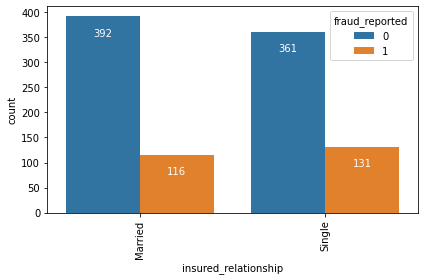

In [ ]:
# Marital Status vs Fraud
ax = sns.countplot(df['insured_relationship'], hue=df['fraud_reported'], palette=palette, order = df['insured_relationship'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.xticks(rotation=90)
plt.tight_layout();

Insight :
Single have higher chance to be fraud than Married insured.

In [ ]:
education = df['insured_education_level'].value_counts()

fig = px.pie(education, 
             values = education.values, 
             names = education.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

Insight :
Most of the total insured are on Second cycle (Master, JD, MD), following by First cycle (High School, College, Associate), and last place is Third cycle (PhD).

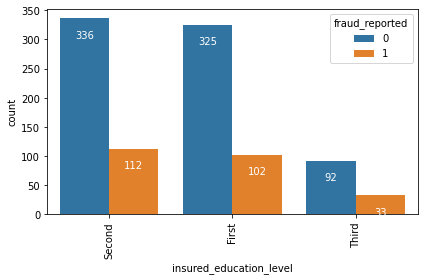

In [ ]:
# Education vs Fraud
ax = sns.countplot(df['insured_education_level'], hue=df['fraud_reported'], palette=palette, order = df['insured_education_level'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.xticks(rotation=90)
plt.tight_layout();

Insight :
Insured on Second cycle most likely reported as fraud than the others.

In [ ]:
hobbies = df['insured_hobbies'].value_counts()

fig = px.pie(hobbies, 
             values = hobbies.values, 
             names = hobbies.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

Insight : The insured with sporty hobbies have more number than not.

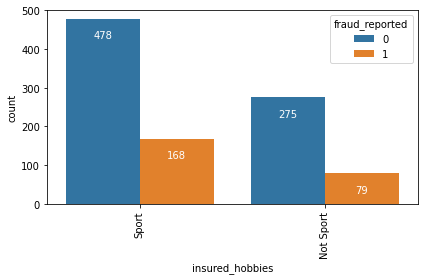

In [ ]:
# Hobbies vs Fraud
ax = sns.countplot(df['insured_hobbies'], hue=df['fraud_reported'], palette=palette, order = df['insured_hobbies'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.xticks(rotation=90)
plt.tight_layout();

Insight : 
Linear with the first hypothesis, the sporty hobbies insured most likely report as fraud. Why linear? Because those with sport hobbies have higher chance to have healthy figure, so in this case will have lower chance to involved on car accidents.

In [ ]:
occupancy = df['insured_occupation'].value_counts()

fig = px.pie(occupancy, 
             values = occupancy.values, 
             names = occupancy.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

Insight : Insured working on industry field have more number, followed by self-proclaim, and finance.

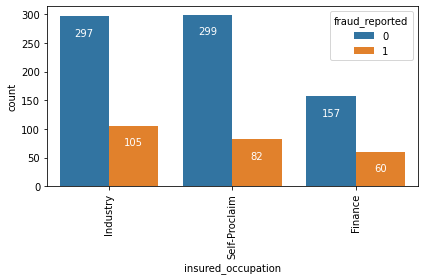

In [ ]:
# Occupancy vs Fraud
ax = sns.countplot(df['insured_occupation'], hue=df['fraud_reported'], palette=palette, order = df['insured_occupation'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.xticks(rotation=90)
plt.tight_layout();

Insight : 
Insured on industry field have higher chance to be reported as fraud than the others.

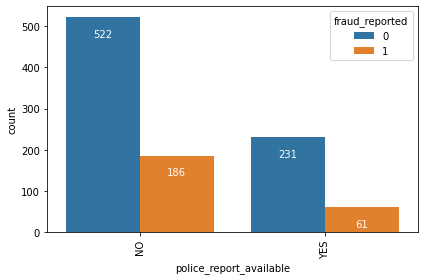

In [ ]:
# Police report vs Fraud
ax = sns.countplot(df['police_report_available'], hue=df['fraud_reported'], palette=palette, order = df['police_report_available'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.xticks(rotation=90)
plt.tight_layout();

Insight : 
Common sense, the insured fraud higher chance happens if there aren't police report.

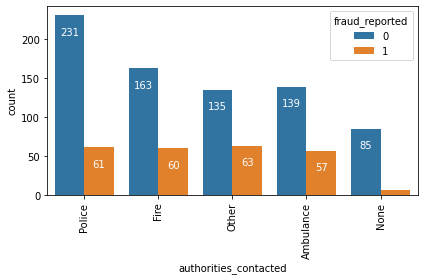

In [ ]:
# Authorities call vs Fraud
ax = sns.countplot(df['authorities_contacted'], hue=df['fraud_reported'], palette=palette, order = df['authorities_contacted'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.xticks(rotation=90)
plt.tight_layout();

Insight : 
Fraud more likely happens if Other than common authorities contacted. But surprisingly, the number didn't have significant different if authorities contacted. Maybe this because of insured lie?

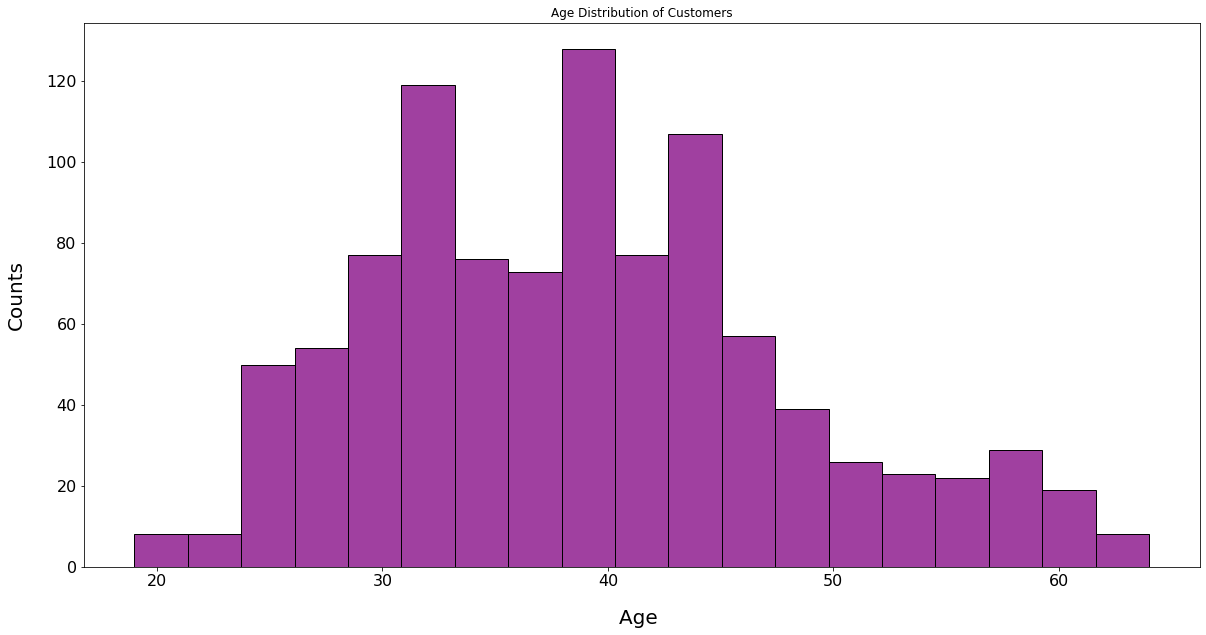

In [ ]:
# Age Distribution
plt.figure(figsize=(20,10))
ax = sns.histplot(data = df['age'], color='purple')
ax.set(title = "Age Distribution of Customers");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age ', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

Insight : Insured age didn't have outlier and positive skewed.

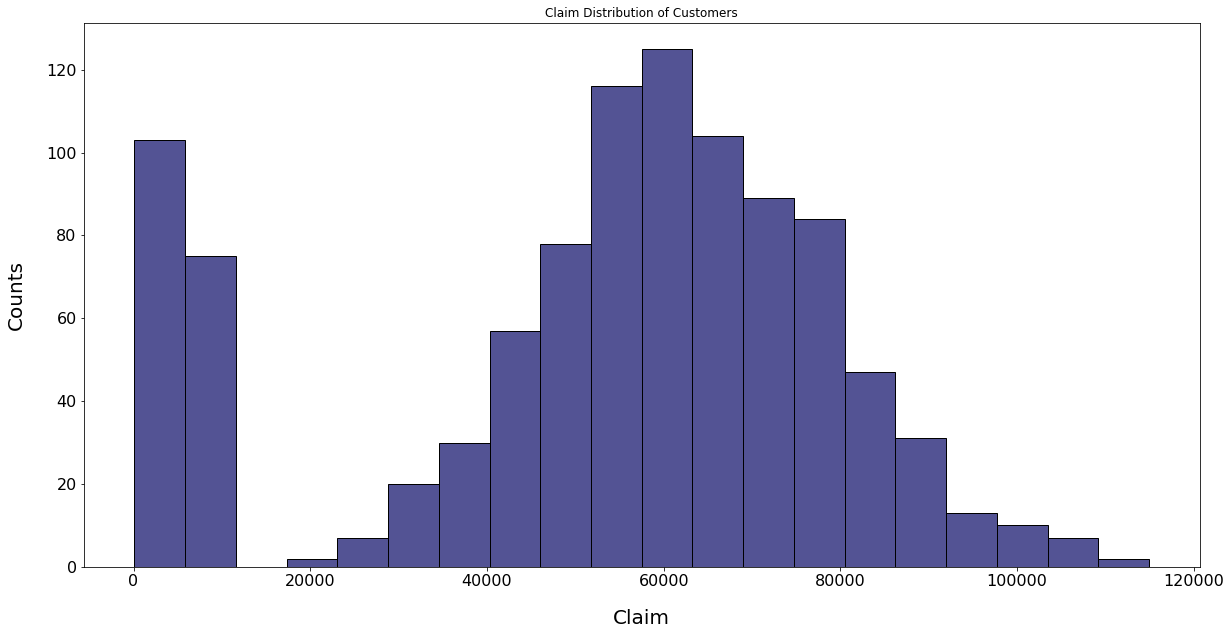

In [ ]:
# Claim Distribution
plt.figure(figsize=(20, 10))
ax = sns.histplot(data = df['total_claim_amount'], color = "midnightblue")
ax.set(title = "Claim Distribution of Customers");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Claim', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

Insight : Insured claim are distributed normally, but there are outlier on < 15000

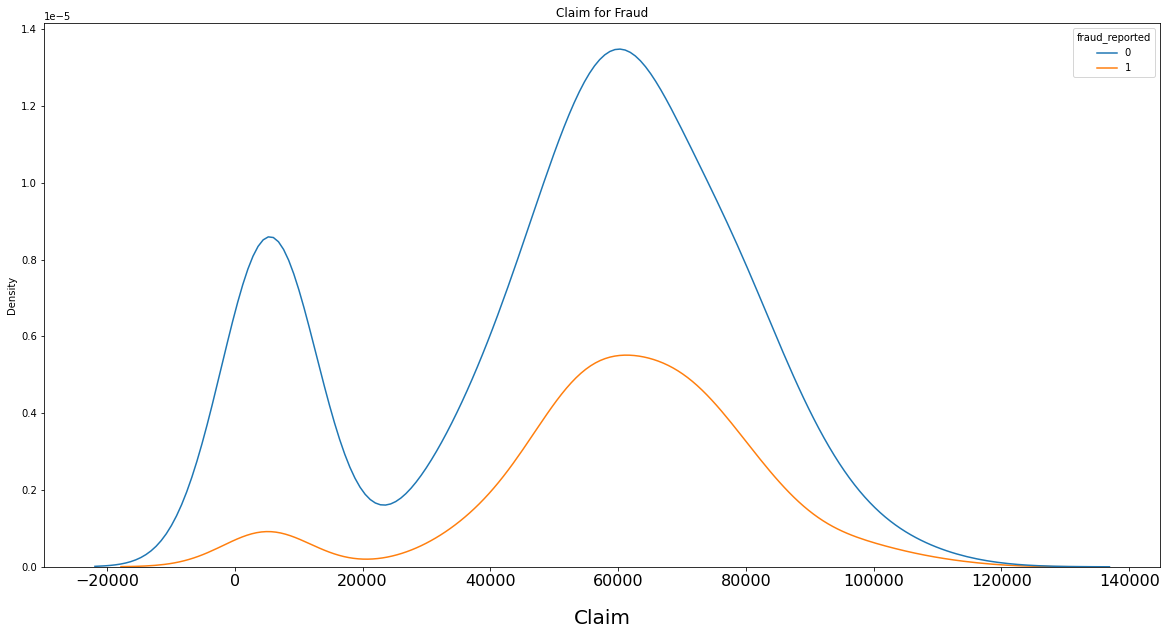

In [ ]:
# Claim density for Fraud
plt.figure(figsize=(20, 10))
ax = sns.kdeplot(x = df['total_claim_amount'], hue = df['fraud_reported'])
ax.set(title = "Claim for Fraud");

plt.xticks( fontsize=16)
plt.xlabel('Claim', fontsize=20, labelpad=20);

Insight : The fraud more likely happens on range 0 - around 10000 and 60000 claim amounts at peak.

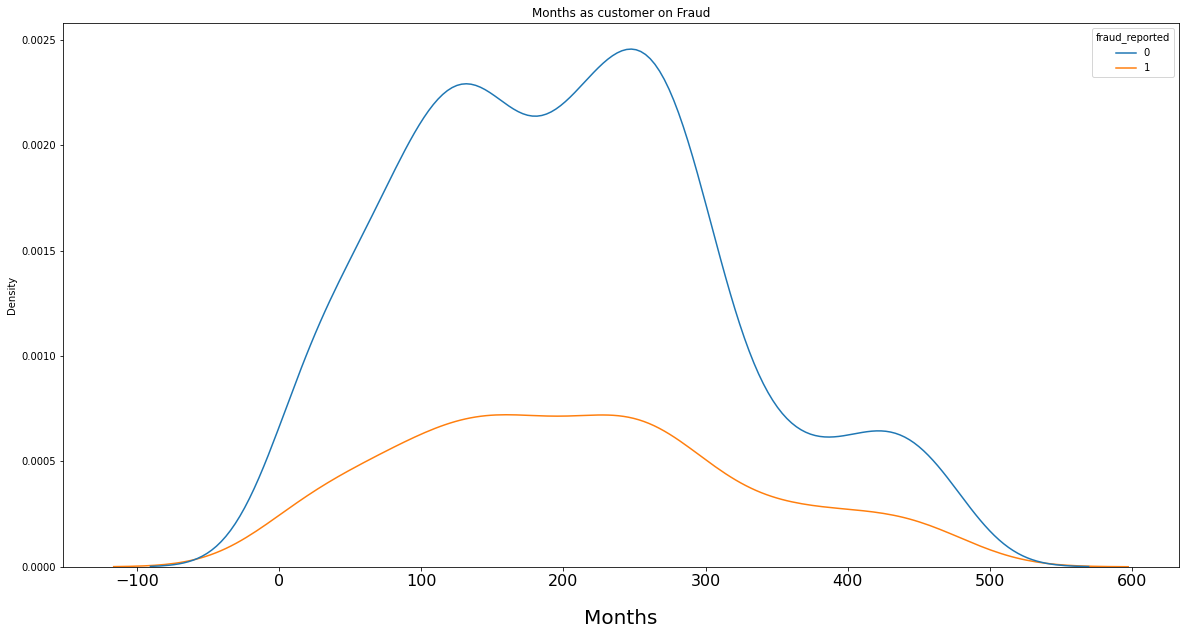

In [ ]:
# Months as customer for Fraud
plt.figure(figsize=(20, 10))
ax = sns.kdeplot(x = df['months_as_customer'], hue = df['fraud_reported'])
ax.set(title = "Months as customer on Fraud");

plt.xticks( fontsize=16)
plt.xlabel('Months', fontsize=20, labelpad=20);

Insight :
From the plot, we know fraud happens at peak on insured with 150-250 months join.

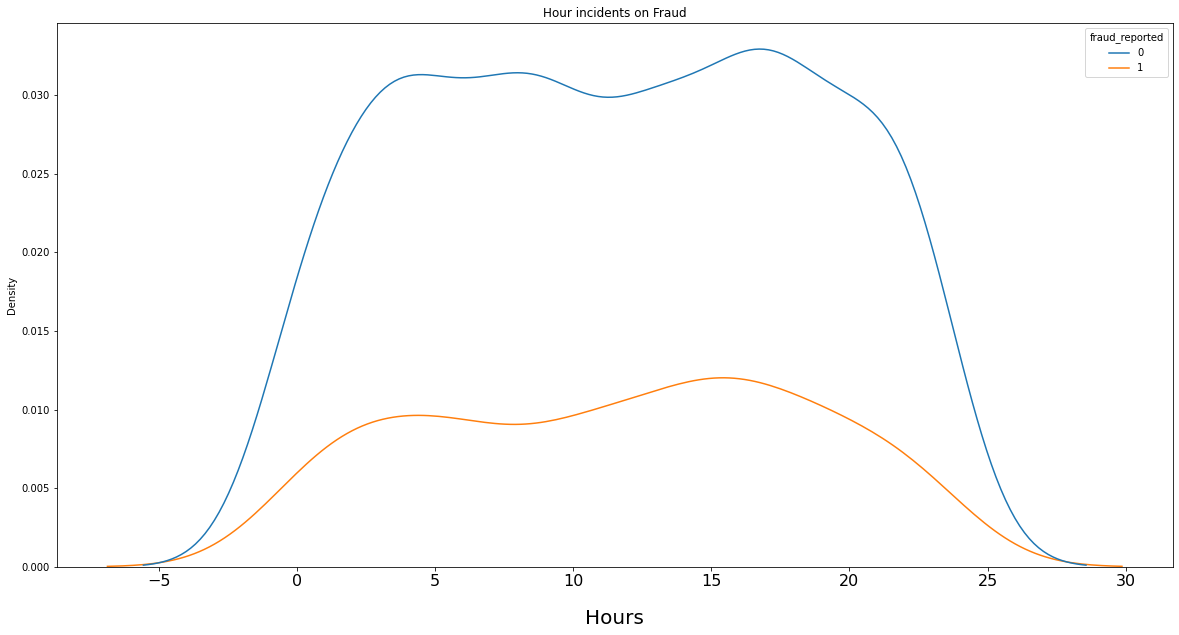

In [ ]:
# Hour incidents for Fraud
plt.figure(figsize=(20, 10))
ax = sns.kdeplot(x = df['incident_hour_of_the_day'], hue = df['fraud_reported'])
ax.set(title = "Hour incidents on Fraud");

plt.xticks( fontsize=16)
plt.xlabel('Hours', fontsize=20, labelpad=20);

Insight :
From the plot, we know fraud happens at peak around 15.00 PM on that report created.

From all of the EDA, we can pull out the summary :
* Single insured have higher chance to reported as fraud than married insured
* Insured from Second cycle, have higher chance to be fraud than others
* Sporty insured more chance to be fraud because healthy insured have higher chance to avoid accident
* Industry field insured have higher fraud chance
* The fraud higher chance happen if other than formal authorities (police, firefighter, ambulance) are contacted and there are no police report on it
* Insured with around 150-250 months join most likely to be fraud
* If the claim amount around range 0 - 10000 and 60000, we must beware of fraud
* The fraud report usually happens at 15.00 AM

Then we can produce a report characteristic that higher chance to be fraud is :
* Made by Single insured
* Second cycle education customer (Masters, JD, MD)
* Industry-field customer
* Not common authorities contacted & no police report
* Insured with 150-250 month joins & around 0-10000 or 60000 total claim amounts
* Report made around 15.00 AM

Which is these characteristic consist of well-educated and industry-field of work insured with fair months join (Unusual, but still make sense. Because of educated and know the "hole", insured maybe find a easy way to get money). The total of claim amounts also very low or average amounts, so insurance company didn't really careful for fraud at some point. But as predicted, the fraud usually avoid police involved and make a report around last minute of work (considered time of work around 8-9 AM to 16-17 PM).

# Encoding & Resampling

## Encoding

In [ ]:
# Marital encoding
# Change to 1 for Married and 0 for Single

df['insured_relationship'] = df['insured_relationship'].replace({'Married': 1,'Single': 0})

In [ ]:
# Education encoding
# Change to 0 for all first cycle ed, 1 for second cycle, 2 for third cycle
# Source : https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/#:~:text=First%20cycle%20is%20for%20the,offered%20at%20all%20three%20cycles

df['insured_education_level'] = df['insured_education_level'].replace({'First': 0, 'Second': 1, 'Third': 2})

In [ ]:
# Property damage, police_report_available encoding
# Change to 1 for YES and 0 for NO

df['property_damage'] = df['property_damage'].replace({'YES': 1,'NO': 0})
df['police_report_available'] = df['property_damage'].replace({'YES': 1,'NO': 0})

In [ ]:
# Hobbies encoding
# Change to 1 for Sport and 0 for Not Sport

df['insured_hobbies'] = df['insured_hobbies'].replace({'Sport': 1,'Not Sport': 0})

In [ ]:
# Gender encoding
# Change to 1 for MALE and 0 for FEMALE

df['insured_sex'] = df['insured_sex'].replace({'MALE' : 1, 'FEMALE' : 0})

In [ ]:
# Severity encoding
# Change to 1 for Total Loss & Major Damge and 0 for Minor Damage & Trivial Damage

df['incident_severity'] = df['incident_severity'].replace({'Total Loss' : 1, 'Major Damage' : 1, 'Trivial Damage' : 0, 'Minor Damage' : 0})

In [ ]:
# One hot encoding for authorities_contacted, incident_type, collision_type, insured_occupation

df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   age                                     1000 non-null   int64  
 2   policy_deductable                       1000 non-null   int64  
 3   policy_annual_premium                   1000 non-null   float64
 4   umbrella_limit                          1000 non-null   int64  
 5   insured_sex                             1000 non-null   int64  
 6   insured_education_level                 1000 non-null   int64  
 7   insured_hobbies                         1000 non-null   int64  
 8   insured_relationship                    1000 non-null   int64  
 9   capital-gains                           1000 non-null   int64  
 10  capital-loss                            1000 non-null   int64

## Resampling

In [ ]:
# Assign 'fraud_reported' column to y 
y = df['fraud_reported'].values
# Assign all columns except 'fraud_reported' to X
X = df.drop(['fraud_reported'], axis = 1).values

In [ ]:
# Check dimension
print('X shape :', X.shape)
print('y shape :', y.shape)

X shape : (1000, 31)
y shape : (1000,)


In [ ]:
# split data to train and test data
# with test size is 20% of overall data
# use stratified sampling
# and set RNG to 1000
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(
    X,
    y,
    test_size = 0.2,
    stratify = y,
    random_state = 1000
)

In [ ]:
# Make a new dataframe using train & test data
train_df_x = pd.DataFrame(X_train_fraud, columns=df.drop(['fraud_reported'], axis = 1).columns)
train_df_y = pd.DataFrame(y_train_fraud, columns=["fraud_reported"])
train_df = pd.concat([train_df_x, train_df_y], axis=1)

test_df_x = pd.DataFrame(X_test_fraud, columns=df.drop(['fraud_reported'], axis = 1).columns)
test_df_y = pd.DataFrame(y_test_fraud, columns=["fraud_reported"])
test_df = pd.concat([test_df_x, test_df_y], axis=1)

In [ ]:
train_df

months_as_customer   age  policy_deductable  policy_annual_premium  \
0                 276.0  47.0             1000.0                1724.09   
1                 126.0  31.0             1000.0                1328.26   
2                 242.0  40.0              500.0                1238.65   
3                  79.0  25.0              500.0                1863.04   
4                 141.0  30.0             1000.0                1347.04   
..                  ...   ...                ...                    ...   
795               165.0  32.0              500.0                1399.26   
796               274.0  45.0             1000.0                1353.53   
797                95.0  28.0             1000.0                 773.99   
798               229.0  37.0             1000.0                1331.94   
799               175.0  39.0              500.0                1359.36   

     umbrella_limit  insured_sex  insured_education_level  insured_hobbies  \
0               0.0          1.0                      2.0              0.0   
1               0.0          1.0                      1.0              1.0   
2               0.0          0.0                      0.0              1.0   
3               0.0          0.0                      0.0              1.0   
4               0.0          1.0                      0.0              1.0   
..              ...          ...                      ...              ...   
795             0.0          0.0                      0.0              1.0   
796             0.0          0.0                      1.0              1.0   
797             0.0          1.0                      0.0              0.0   
798             0.0          0.0                      1.0              1.0   
799       5000000.0          1.0                      2.0              1.0   

     insured_relationship  capital-gains  ...  \
0                     1.0            0.0  ...   
1                     0.0        42300.0  ...   
2                     1.0            0.0  ...   
3                     0.0        53400.0  ...   
4                     1.0            0.0  ...   
..                    ...            ...  ...   
795                   1.0        70500.0  ...   
796                   0.0        54700.0  ...   
797                   0.0            0.0  ...   
798                   0.0            0.0  ...   
799                   1.0            0.0  ...   

     incident_type_Single Vehicle Collision  incident_type_Vehicle Theft  \
0                                       0.0                          0.0   
1                                       1.0                          0.0   
2                                       0.0                          1.0   
3                                       1.0                          0.0   
4                                       0.0                          0.0   
..                                      ...                          ...   
795                                     0.0                          0.0   
796                                     1.0                          0.0   
797                                     0.0                          1.0   
798                                     1.0                          0.0   
799                                     0.0                          0.0   

     collision_type_No Collision  collision_type_Rear Collision  \
0                            0.0                            1.0   
1                            0.0                            0.0   
2                            1.0                            0.0   
3                            0.0                            0.0   
4                            1.0                            0.0   
..                           ...                            ...   
795                          1.0                            0.0   
796                          0.0                            0.0   
797                          1.0                            0.

In [ ]:
test_df

months_as_customer   age  policy_deductable  policy_annual_premium  \
0                 134.0  32.0             1000.0                1000.06   
1                 116.0  31.0              500.0                1194.83   
2                 343.0  52.0             1000.0                1053.02   
3                 254.0  45.0              500.0                1083.64   
4                 153.0  34.0              500.0                 991.39   
..                  ...   ...                ...                    ...   
195               342.0  49.0              500.0                1722.95   
196                35.0  29.0             2000.0                 653.66   
197                54.0  35.0              500.0                1261.28   
198               256.0  41.0             2000.0                1415.74   
199                94.0  30.0             2000.0                1025.54   

     umbrella_limit  insured_sex  insured_education_level  insured_hobbies  \
0               0.0          0.0                      2.0              1.0   
1               0.0          0.0                      1.0              1.0   
2               0.0          0.0                      0.0              1.0   
3               0.0          1.0                      1.0              1.0   
4               0.0          1.0                      0.0              1.0   
..              ...          ...                      ...              ...   
195             0.0          1.0                      2.0              1.0   
196             0.0          0.0                      1.0              0.0   
197             0.0          0.0                      1.0              1.0   
198       6000000.0          0.0                      2.0              0.0   
199             0.0          0.0                      0.0              1.0   

     insured_relationship  capital-gains  ...  \
0                     1.0            0.0  ...   
1                     1.0        28600.0  ...   
2                     0.0            0.0  ...   
3                     1.0        59800.0  ...   
4                     0.0        45600.0  ...   
..                    ...            ...  ...   
195                   0.0        63100.0  ...   
196                   0.0        52100.0  ...   
197                   0.0        68500.0  ...   
198                   0.0        48900.0  ...   
199                   0.0            0.0  ...   

     incident_type_Single Vehicle Collision  incident_type_Vehicle Theft  \
0                                       1.0                          0.0   
1                                       1.0                          0.0   
2                                       1.0                          0.0   
3                                       0.0                          0.0   
4                                       0.0                          0.0   
..                                      ...                          ...   
195                                     1.0                          0.0   
196                                     0.0                          0.0   
197                                     0.0                          0.0   
198                                     1.0                          0.0   
199                                     1.0                          0.0   

     collision_type_No Collision  collision_type_Rear Collision  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            1.0   
4                            0.0                            0.0   
..                           ...                            ...   
195                          0.0                            1.0   
196                          0.0                            1.0   
197                          0.0                            0.

# Pre-processing

## Outlier Handling

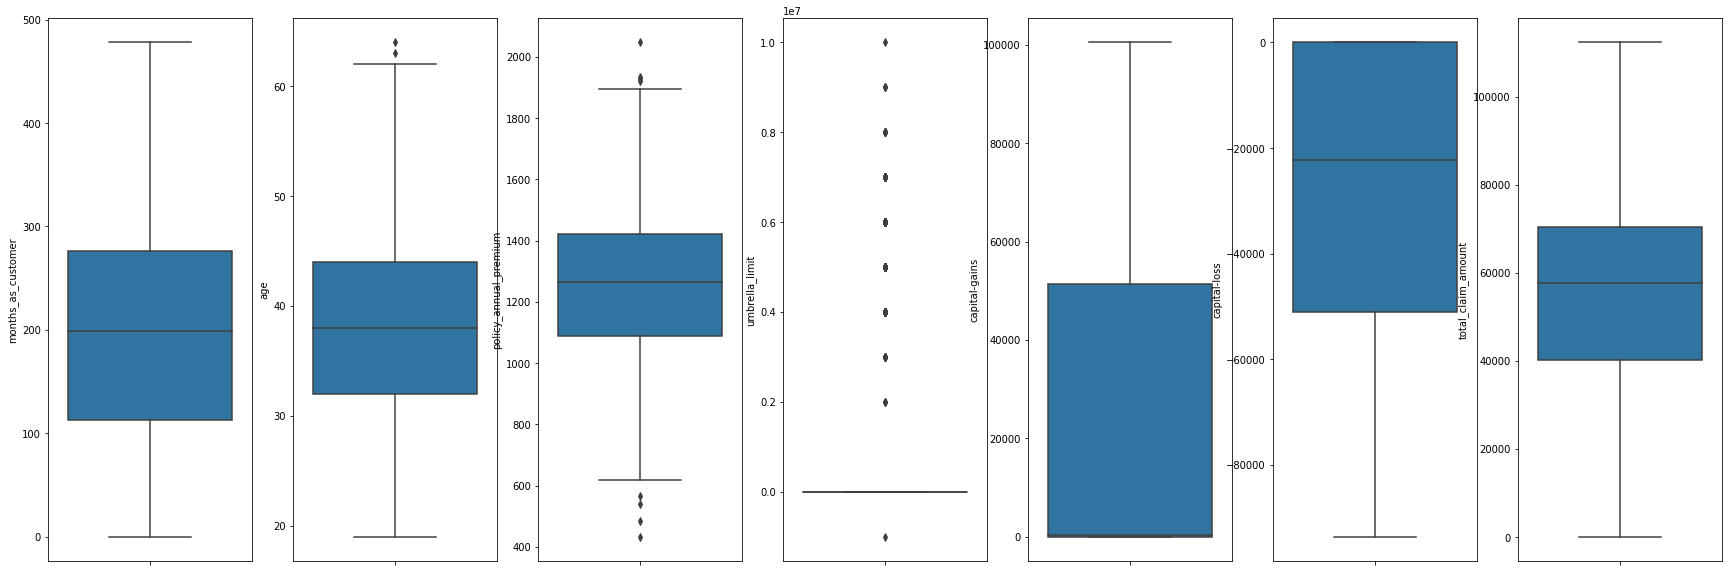

In [ ]:
# Check outlier from the train data
fig, axis = plt.subplots(1, 7, figsize=(30, 10))

ax = sns.boxplot(y=train_df['months_as_customer'], ax=axis[0])
ax = sns.boxplot(y=train_df['age'], ax=axis[1])
ax = sns.boxplot(y=train_df['policy_annual_premium'], ax=axis[2])
ax = sns.boxplot(y=train_df['umbrella_limit'], ax=axis[3])
ax = sns.boxplot(y=train_df['capital-gains'], ax=axis[4])
ax = sns.boxplot(y=train_df['capital-loss'], ax=axis[5])
ax = sns.boxplot(y=train_df['total_claim_amount'], ax=axis[6]);

From the plot above, we know that there are outliers on `policy_annual_premium`, `umbrella_limit` , and `age`.

In [ ]:
# Removing Outliers on train data
outlier_col = ['months_as_customer', 'age', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'total_claim_amount']
for col in outlier_col:
  Q1 = train_df[col].quantile(0.25)
  Q3 = train_df[col].quantile(0.75)
  IQR = Q3 - Q1
  Lwishker = Q1 - 1.5 * IQR
  Uwishker = Q3 + 1.5 * IQR
  train_df[col] = train_df[col].clip(Lwishker, Uwishker)

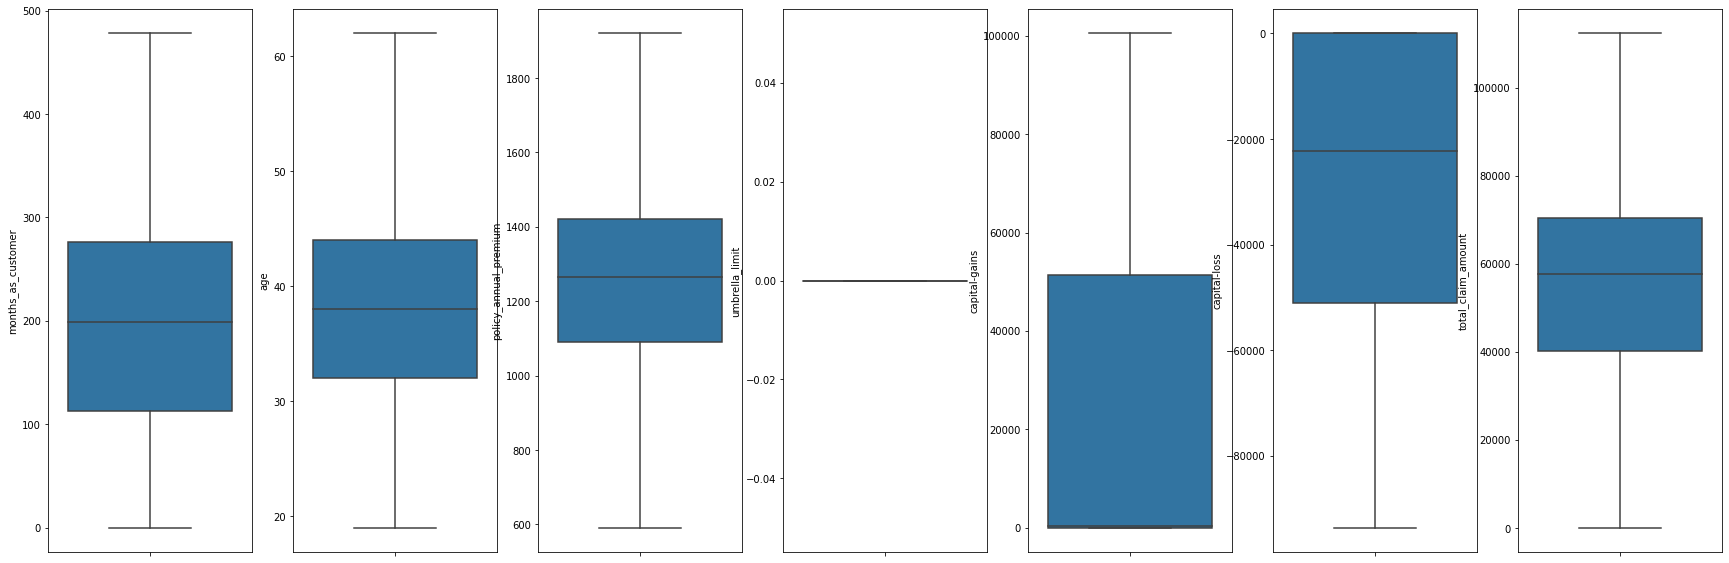

In [ ]:
fig, axis = plt.subplots(1, 7, figsize=(30, 10))

ax = sns.boxplot(y=train_df['months_as_customer'], ax=axis[0])
ax = sns.boxplot(y=train_df['age'], ax=axis[1])
ax = sns.boxplot(y=train_df['policy_annual_premium'], ax=axis[2])
ax = sns.boxplot(y=train_df['umbrella_limit'], ax=axis[3])
ax = sns.boxplot(y=train_df['capital-gains'], ax=axis[4])
ax = sns.boxplot(y=train_df['capital-loss'], ax=axis[5])
ax = sns.boxplot(y=train_df['total_claim_amount'], ax=axis[6]);

Now, we have removed all outliers values from train data

## Normalization

Also, there is some feature that have numerical feature with high value. For these we will use normalization to tranform the feature into 0~1 range

In [ ]:
# Transform data using normalization
col_trans = df.columns
scaler = MinMaxScaler()
train_df[col_trans] = scaler.fit_transform(train_df[col_trans])
test_df[col_trans] = scaler.transform(test_df[col_trans])

In [ ]:
# Check train df
train_df

months_as_customer       age  policy_deductable  policy_annual_premium  \
0              0.577406  0.651163           0.333333               0.852575   
1              0.263598  0.279070           0.333333               0.554634   
2              0.506276  0.488372           0.000000               0.487184   
3              0.165272  0.139535           0.000000               0.957163   
4              0.294979  0.255814           0.333333               0.568770   
..                  ...       ...                ...                    ...   
795            0.345188  0.302326           0.000000               0.608076   
796            0.573222  0.604651           0.333333               0.573655   
797            0.198745  0.209302           0.333333               0.137435   
798            0.479079  0.418605           0.333333               0.557404   
799            0.366109  0.465116           0.000000               0.578043   

     umbrella_limit  insured_sex  insured_education_level  insured_hobbies  \
0               0.0          1.0                      1.0              0.0   
1               0.0          1.0                      0.5              1.0   
2               0.0          0.0                      0.0              1.0   
3               0.0          0.0                      0.0              1.0   
4               0.0          1.0                      0.0              1.0   
..              ...          ...                      ...              ...   
795             0.0          0.0                      0.0              1.0   
796             0.0          0.0                      0.5              1.0   
797             0.0          1.0                      0.0              0.0   
798             0.0          0.0                      0.5              1.0   
799             0.0          1.0                      1.0              1.0   

     insured_relationship  capital-gains  ...  \
0                     1.0       0.000000  ...   
1                     0.0       0.420896  ...   
2                     1.0       0.000000  ...   
3                     0.0       0.531343  ...   
4                     1.0       0.000000  ...   
..                    ...            ...  ...   
795                   1.0       0.701493  ...   
796                   0.0       0.544279  ...   
797                   0.0       0.000000  ...   
798                   0.0       0.000000  ...   
799                   1.0       0.000000  ...   

     incident_type_Single Vehicle Collision  incident_type_Vehicle Theft  \
0                                       0.0                          0.0   
1                                       1.0                          0.0   
2                                       0.0                          1.0   
3                                       1.0                          0.0   
4                                       0.0                          0.0   
..                                      ...                          ...   
795                                     0.0                          0.0   
796                                     1.0                          0.0   
797                                     0.0                          1.0   
798                                     1.0                          0.0   
799                                     0.0                          0.0   

     collision_type_No Collision  collision_type_Rear Collision  \
0                            0.0                            1.0   
1                            0.0                            0.0   
2                            1.0                            0.0   
3                            0.0                            0.0   
4                            1.0                            0.0   
..                           ...                            ...   
795                          1.0                            0.0   
796                          0.0                            0.0   
797           

In [ ]:
# Check descriptive stats for train df
train_df.describe()

months_as_customer         age  policy_deductable  \
count          800.000000  800.000000         800.000000   
mean             0.426315    0.460698           0.420417   
std              0.240313    0.212486           0.407549   
min              0.000000    0.000000           0.000000   
25%              0.235879    0.302326           0.000000   
50%              0.416318    0.441860           0.333333   
75%              0.577406    0.581395           1.000000   
max              1.000000    1.000000           1.000000   

       policy_annual_premium  umbrella_limit  insured_sex  \
count             800.000000           800.0   800.000000   
mean                0.502408             0.0     0.467500   
std                 0.181947             0.0     0.499255   
min                 0.000000             0.0     0.000000   
25%                 0.375000             0.0     0.000000   
50%                 0.508057             0.0     0.000000   
75%                 0.625000             0.0     1.000000   
max                 1.000000             0.0     1.000000   

       insured_education_level  insured_hobbies  insured_relationship  \
count               800.000000       800.000000            800.000000   
mean                  0.350625         0.642500              0.512500   
std                   0.340984         0.479564              0.500156   
min                   0.000000         0.000000              0.000000   
25%                   0.000000         0.000000              0.000000   
50%                   0.500000         1.000000              1.000000   
75%                   0.500000         1.000000              1.000000   
max                   1.000000         1.000000              1.000000   

       capital-gains  ...  incident_type_Single Vehicle Collision  \
count     800.000000  ...                               800.00000   
mean        0.255828  ...                                 0.40875   
std         0.279994  ...                                 0.49191   
min         0.000000  ...                                 0.00000   
25%         0.000000  ...                                 0.00000   
50%         0.003980  ...                                 0.00000   
75%         0.510448  ...                                 1.00000   
max         1.000000  ...                                 1.00000   

       incident_type_Vehicle Theft  collision_type_No Collision  \
count                   800.000000                   800.000000   
mean                      0.098750                     0.186250   
std                       0.298513                     0.389552   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.000000                     0.000000   
max                       1.000000                     1.000000   

       collision_type_Rear Collision  collision_type_Side Collision  \
count                     800.000000                     800.000000   
mean                        0.292500                       0.266250   
std                         0.455195                       0.442273   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         1.000000                       1.000000   
max                         1.000000                       1.000000   

       authorities_contacted_Fire  authorities_contacted_None  \
count                  800.000000                  800.000000   
mean                     0.226250                    0.093750   
std                      0.418665                    0.291663   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50

In [ ]:
# Check test df
test_df

months_as_customer       age  policy_deductable  policy_annual_premium  \
0              0.280335  0.302326           0.333333               0.307598   
1              0.242678  0.279070           0.000000               0.454201   
2              0.717573  0.767442           0.333333               0.347461   
3              0.531381  0.604651           0.000000               0.370508   
4              0.320084  0.348837           0.000000               0.301072   
..                  ...       ...                ...                    ...   
195            0.715481  0.697674           0.000000               0.851717   
196            0.073222  0.232558           1.000000               0.046862   
197            0.112971  0.372093           0.000000               0.504218   
198            0.535565  0.511628           1.000000               0.620480   
199            0.196653  0.255814           1.000000               0.326776   

     umbrella_limit  insured_sex  insured_education_level  insured_hobbies  \
0               0.0          0.0                      1.0              1.0   
1               0.0          0.0                      0.5              1.0   
2               0.0          0.0                      0.0              1.0   
3               0.0          1.0                      0.5              1.0   
4               0.0          1.0                      0.0              1.0   
..              ...          ...                      ...              ...   
195             0.0          1.0                      1.0              1.0   
196             0.0          0.0                      0.5              0.0   
197             0.0          0.0                      0.5              1.0   
198       6000000.0          0.0                      1.0              0.0   
199             0.0          0.0                      0.0              1.0   

     insured_relationship  capital-gains  ...  \
0                     1.0       0.000000  ...   
1                     1.0       0.284577  ...   
2                     0.0       0.000000  ...   
3                     1.0       0.595025  ...   
4                     0.0       0.453731  ...   
..                    ...            ...  ...   
195                   0.0       0.627861  ...   
196                   0.0       0.518408  ...   
197                   0.0       0.681592  ...   
198                   0.0       0.486567  ...   
199                   0.0       0.000000  ...   

     incident_type_Single Vehicle Collision  incident_type_Vehicle Theft  \
0                                       1.0                          0.0   
1                                       1.0                          0.0   
2                                       1.0                          0.0   
3                                       0.0                          0.0   
4                                       0.0                          0.0   
..                                      ...                          ...   
195                                     1.0                          0.0   
196                                     0.0                          0.0   
197                                     0.0                          0.0   
198                                     1.0                          0.0   
199                                     1.0                          0.0   

     collision_type_No Collision  collision_type_Rear Collision  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            1.0   
4                            0.0                            0.0   
..                           ...                            ...   
195                          0.0                            1.0   
196                          0.0                            1.0   
197           

In [ ]:
# Check descriptive stats for test df
test_df.describe()

months_as_customer         age  policy_deductable  \
count          200.000000  200.000000         200.000000   
mean             0.428149    0.476395           0.438333   
std              0.243453    0.212031           0.410060   
min              0.010460    0.046512           0.000000   
25%              0.252615    0.302326           0.000000   
50%              0.422594    0.465116           0.333333   
75%              0.592573    0.604651           1.000000   
max              1.002092    1.046512           1.000000   

       policy_annual_premium  umbrella_limit  insured_sex  \
count             200.000000    2.000000e+02   200.000000   
mean                0.493825    9.950000e+05     0.445000   
std                 0.185855    2.262869e+06     0.498213   
min                 0.046862    0.000000e+00     0.000000   
25%                 0.374466    0.000000e+00     0.000000   
50%                 0.484373    0.000000e+00     0.000000   
75%                 0.609334    0.000000e+00     1.000000   
max                 1.037393    1.000000e+07     1.000000   

       insured_education_level  insured_hobbies  insured_relationship  \
count                200.00000       200.000000            200.000000   
mean                   0.34250         0.660000              0.490000   
std                    0.33467         0.474898              0.501154   
min                    0.00000         0.000000              0.000000   
25%                    0.00000         0.000000              0.000000   
50%                    0.50000         1.000000              0.000000   
75%                    0.50000         1.000000              1.000000   
max                    1.00000         1.000000              1.000000   

       capital-gains  ...  incident_type_Single Vehicle Collision  \
count     200.000000  ...                              200.000000   
mean        0.226741  ...                                0.380000   
std         0.265839  ...                                0.486604   
min         0.000000  ...                                0.000000   
25%         0.000000  ...                                0.000000   
50%         0.000000  ...                                0.000000   
75%         0.479104  ...                                1.000000   
max         0.883582  ...                                1.000000   

       incident_type_Vehicle Theft  collision_type_No Collision  \
count                   200.000000                   200.000000   
mean                      0.075000                     0.145000   
std                       0.264052                     0.352984   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.000000                     0.000000   
max                       1.000000                     1.000000   

       collision_type_Rear Collision  collision_type_Side Collision  \
count                     200.000000                     200.000000   
mean                        0.290000                       0.315000   
std                         0.454901                       0.465682   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         1.000000                       1.000000   
max                         1.000000                       1.000000   

       authorities_contacted_Fire  authorities_contacted_None  \
count                   200.00000                  200.000000   
mean                      0.21000                    0.080000   
std                       0.40833                    0.271974   
min                       0.00000                    0.000000   
25%                       0.00000                    0.000000   
50

In [ ]:
# Reseparate independent and dependent feature of the train-test df
X_train_fraud = train_df.drop(['fraud_reported'], axis=1)
y_train_fraud = train_df['fraud_reported']

X_test_fraud = test_df.drop(['fraud_reported'], axis=1)
y_test_fraud = test_df['fraud_reported']

# Model Selection

For this chance, we would like to select model from two basic models (LogisticRegression, KNN) and two complex models (RandomForest, XGBoost)

In [ ]:
# Logistic Regression
logreg = LogisticRegression(random_state=1000)

# Logreg params
logreg_params = {
    'penalty': ['elasticnet', 'l2'],
    'fit_intercept': [True, False],
    'C': [0.25, 0.5, 0.75, 1.0]
}

# define model with GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg, 
    param_grid=logreg_params, 
    n_jobs=1, 
    verbose=1,
    cv = 5,
    scoring = "f1"
)

# fitting gridsearch
grid_search.fit(X_train_fraud, y_train_fraud)

# check the best estimator
grid_search.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


LogisticRegression(fit_intercept=False, random_state=1000)

In [ ]:
# K Nearest Neighbors
knn = KNeighborsClassifier()

# knn params
knn_params = {
    'n_neighbors': [2,3,4,5],
    'p': [1, 2]
}

# define model with GridSearchCV
grid_search = GridSearchCV(
    estimator=knn, 
    param_grid=knn_params, 
    n_jobs=1, 
    verbose=1,
    cv = 5,
    scoring = "f1"
)

# fitting gridsearch
grid_search.fit(X_train_fraud, y_train_fraud)

# check the best estimator
grid_search.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


KNeighborsClassifier(n_neighbors=3, p=1)

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=1000)

# rf_params
rf_params = {
    'n_estimators': [10, 50, 100, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,5,10,'None'],
    'max_features': ['sqrt', 'log2']
}

# define model with GridSearchCV
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=rf_params, 
    n_jobs=1, 
    verbose=1,
    cv = 5,
    scoring = "f1"
)

# fitting gridsearch
grid_search.fit(X_train_fraud, y_train_fraud)

# check the best estimator
grid_search.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=10,
                       random_state=1000)

In [ ]:
# XGBoost
xgb = XGBClassifier(random_state=1000)

# xgb_params
xgb_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3,5,10,'None'],
    'learning_rate': [0.1, 0.05, 0.01],
    'grow_policy': ['depthwise', 'lossguide']
}

# define model with GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb, 
    param_grid=xgb_params, 
    n_jobs=1, 
    verbose=1,
    cv = 5,
    scoring = "f1"
)

# fitting gridsearch
grid_search.fit(X_train_fraud, y_train_fraud)

# check the best estimator
grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


XGBClassifier(grow_policy='depthwise', learning_rate=0.01, max_depth=10,
              n_estimators=10, random_state=1000)

In [ ]:
def create_models(seed=1000):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('Logistic Regression', LogisticRegression(random_state=seed, fit_intercept=False)))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=3, p=1)))
    models.append(('Random Forest', RandomForestClassifier(random_state = seed, max_depth=10, max_features='sqrt', n_estimators=10)))
    models.append(('XGBoost', XGBClassifier(random_state = seed, grow_policy='depthwise', learning_rate=0.01, max_depth=10, n_estimators=10)))
    
    return models

# create a list with all the algorithms we are going to assess
models = create_models()

In [ ]:
# test the F1 Score of each model using default hyperparameters
results = []
names = []
scoring = 'F1 Score'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train_fraud, y_train_fraud).predict(X_test_fraud)
    # make predictions with the testing data
    predictions = model.predict(X_test_fraud)
    # calculate f1_score 
    f1score = f1_score(y_test_fraud, predictions)
    # append the model name and the F1 Score to the lists
    results.append(f1score)
    names.append(name)
    # print classifier F1 Score
    print('Classifier: {}, F1 Score: {})'.format(name, f1score))

Classifier: Logistic Regression, F1 Score: 0.12903225806451613)
Classifier: KNN, F1 Score: 0.2696629213483146)
Classifier: Random Forest, F1 Score: 0.1492537313432836)
Classifier: XGBoost, F1 Score: 0.3809523809523809)


In [ ]:
for name,model in models:
  model.fit(X_train_fraud, y_train_fraud).predict(X_test_fraud)
  predictions = model.predict(X_test_fraud)
  print('='*75)
  print('Classifier: {}'.format(name))
  print(pd.DataFrame(metrics.classification_report(y_test_fraud, predictions, target_names=['not fraud','fraud'], output_dict=True)))

Classifier: Logistic Regression
            not fraud      fraud  accuracy   macro avg  weighted avg
precision    0.759358   0.307692      0.73    0.533525      0.648700
recall       0.940397   0.081633      0.73    0.511015      0.730000
f1-score     0.840237   0.129032      0.73    0.484634      0.665992
support    151.000000  49.000000      0.73  200.000000    200.000000
Classifier: KNN
            not fraud      fraud  accuracy   macro avg  weighted avg
precision    0.768750   0.300000     0.675    0.534375      0.653906
recall       0.814570   0.244898     0.675    0.529734      0.675000
f1-score     0.790997   0.269663     0.675    0.530330      0.663270
support    151.000000  49.000000     0.675  200.000000    200.000000
Classifier: Random Forest
            not fraud      fraud  accuracy   macro avg  weighted avg
precision    0.758242   0.277778     0.715    0.518010      0.640528
recall       0.913907   0.102041     0.715    0.507974      0.715000
f1-score     0.828829   0.149

From the summary we got, the highest F1 Score is XG Boost models (38,09%). But if we look at others metrics, clearly we know that there are imbalanced problem on our dataset. We will handle this on modelling section using G-Means.

In [ ]:
# check train target counts
y_train_fraud.value_counts()

0.0    602
1.0    198
Name: fraud_reported, dtype: int64

In [ ]:
# check test target counts
y_test_fraud.value_counts()

0.0    151
1.0     49
Name: fraud_reported, dtype: int64

# Modelling

## Modelling with best model

In [ ]:
# define XGBoost model
xgb = XGBClassifier(random_state=1000, grow_policy='depthwise', learning_rate=0.01, max_depth=10, n_estimators=10)
# fit model to data
xgb.fit(X_train_fraud, y_train_fraud)

XGBClassifier(grow_policy='depthwise', learning_rate=0.01, max_depth=10,
              n_estimators=10, random_state=1000)

## Model Evaluation

In [ ]:
# predict
pred_result = xgb.predict(X_test_fraud)
pred_proba_result = xgb.predict_proba(X_test_fraud)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test_fraud, pred_result, target_names=['not fraud','fraud'], output_dict=True))

not fraud      fraud  accuracy   macro avg  weighted avg
precision    0.800000   0.457143      0.74    0.628571      0.716000
recall       0.874172   0.326531      0.74    0.600351      0.740000
f1-score     0.835443   0.380952      0.74    0.608198      0.724093
support    151.000000  49.000000      0.74  200.000000    200.000000

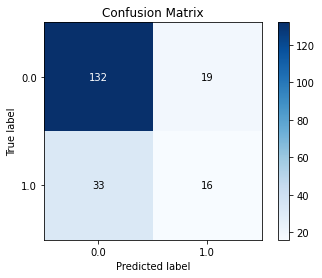

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test_fraud, pred_result);

The confusion matrix show :

* The model predicted fraud and the insured actually fraud is 16 (True Positive)
* The model predicted not fraud and the insured actually fraud is 33 (False Negative)
* The model predicted fraud and the insured actually not fraud is 19 (False Positive)
* The model predicted not fraud and the insured actually not fraud is 132 (True Negative)

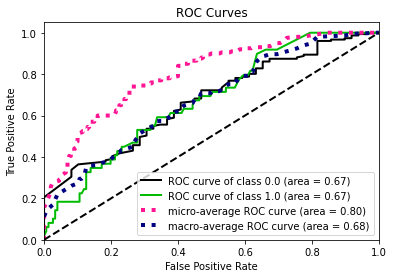

In [ ]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test_fraud, pred_proba_result);

The model succeed to distinct between True Positive and True Negative with chance 68%

In [ ]:
# check f1-score
metrics.f1_score(y_test_fraud, pred_result)

0.3809523809523809

The harmony between precision and recall score of the best model is 38.09%

## Imbalanced Modelling using G-Means

In [ ]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test_fraud, pred_proba_result[:,1])

# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

# find the best threshold
ix = np.argmax(gmeans)

print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.4743976593017578, G-Mean=0.6260549955180966


In [ ]:
# change predict proba result to optimized one using new threshold
new_pred_result = (pred_proba_result[:,1] >= thresholds[ix]).astype(int)

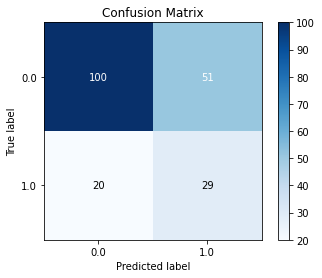

In [ ]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test_fraud, new_pred_result);

After using G-Means tresholding, the confusion matrix show :

* The model predicted fraud and the insured actually fraud is 29 (True Positive)
* The model predicted not fraud and the insured actually fraud is 20 (False Negative)
* The model predicted fraud and the insured actually not fraud is 51 (False Positive)
* The model predicted not fraud and the insured actually not fraud is 100 (True Negative)

In [ ]:
# check f1-score
metrics.f1_score(y_test_fraud, new_pred_result)

0.44961240310077516

In [ ]:
# compare to the old f-1 score
metrics.f1_score(y_test_fraud, pred_result)

0.3809523809523809

In [ ]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test_fraud, new_pred_result, target_names=['not fraud','fraud'], output_dict=True))

not fraud      fraud  accuracy   macro avg  weighted avg
precision    0.833333   0.362500     0.645    0.597917      0.717979
recall       0.662252   0.591837     0.645    0.627044      0.645000
f1-score     0.738007   0.449612     0.645    0.593810      0.667351
support    151.000000  49.000000     0.645  200.000000    200.000000

In [ ]:
# check classification report result of previous prediction result
pd.DataFrame(metrics.classification_report(y_test_fraud, pred_result, target_names=['not fraud','fraud'], output_dict=True))

not fraud      fraud  accuracy   macro avg  weighted avg
precision    0.800000   0.457143      0.74    0.628571      0.716000
recall       0.874172   0.326531      0.74    0.600351      0.740000
f1-score     0.835443   0.380952      0.74    0.608198      0.724093
support    151.000000  49.000000      0.74  200.000000    200.000000

G-Means tresholding succeed to improve model F1 score from 38,09% to 44,96% (up 6,87%)

## Model Interpretation

### Dalex

In [ ]:
## initiate explainer for XGBoost model
fraud_xgb_exp = dx.Explainer(xgb, X_train_fraud, y_train_fraud, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 800 rows 31 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 800 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x7fbf61d71200> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.456, mean = 0.477, max = 0.533
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.523, mean = -0.23, max = 0.544
  -> model_info        : package xgboost

A new explainer has been created!


In [ ]:
# visualize permutation feature importance for XGBoost model
fraud_xgb_exp.model_parts().plot()

From the plot above, we know that 5 highest importance variable is `incident_severity` , `policy_annual_premium`, `collision_type_Rear Collision`, `capital_gains`, `total_claim_amount`. 

In [ ]:
# create partial dependence plot of XGBoost model
fraud_xgb_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 31/31 [00:01<00:00, 28.57it/s]


### SHAP

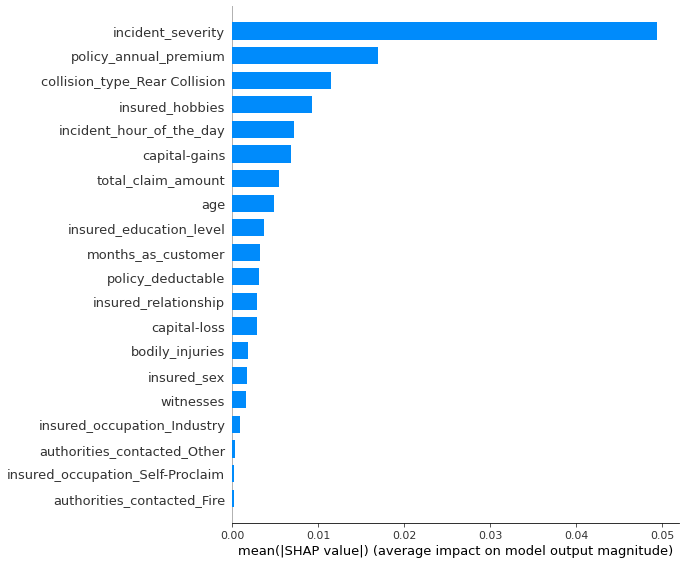

In [ ]:
# create SHAP Tree Explainer for XGBoost model with| first 500 rows of train data
xgb_shap_values = shap.TreeExplainer(xgb).shap_values(X_train_fraud[:500])

# create SHAP summary plot with next 500 rows of train data
shap.summary_plot(xgb_shap_values, X_train_fraud[500:1000], plot_type='bar')

From the SHAP plot above, we know that 5 highest importance variable is `incident_severity` , `policy_annual_premium`, `collision_type_Rear Collision`, `insured_hobbies`, `incident_hour_of_the_day`. 

In [ ]:
# create SHAP Tree Explainer for XGBoost model with all rows of train data
xgb_explainer = shap.TreeExplainer(xgb)
# create shap values from xgb_explainer
xgb_shap_values = xgb_explainer.shap_values(X_train_fraud)

In [ ]:
# initiate javascript module
shap.initjs()

# explain prediction for the first row of X_train_fraud
shap.force_plot(xgb_explainer.expected_value, xgb_shap_values[1,:], X_train_fraud.iloc[1,:])

From the force plot above that based on first customer, the customer predicted as 0 (due to low score which is -1.84). If we take a look on the direction of the feature, we found that :
* The feature that have positive impact to the data is `incident_severity`, `insured_sex`, `insured_hobbies`, `policy_annual_premium`. And `incident_severity` is the strongest impact among them.
* The feature that have negative impact to the data is `capital-gains`, `incident_hour_of_the_day`, `age`, `insured_occupation_industry`, `collision_type_Rear Collision`. And `capital-gains` is the strongest impact among them.

In [ ]:
# initiate javascript module
shap.initjs()

# explain prediction for the first row of X_train
shap.force_plot(xgb_explainer.expected_value, xgb_shap_values[:1000,:], X_train_fraud.iloc[:1000,:])

### LIME

In [ ]:
# re-define XGB model using .values
xgb = XGBClassifier(random_state=1000, grow_policy='depthwise', learning_rate=0.01, max_depth=10, n_estimators=10)
# fit model to data
xgb.fit(X_train_fraud.values, y_train_fraud.values)

# predict
pred_result = xgb.predict(X_test_fraud.values)
pred_proba_result = xgb.predict_proba(X_test_fraud.values)

In [ ]:
# define XGB explainer with lime module
lime_explainer = LimeTabularExplainer(
    X_train_fraud.values,
    feature_names = X_train_fraud.columns.tolist(),
    class_names = ['not fraud', 'fraud'],
    discretize_continuous = True,
    verbose = True
)

In [ ]:
user_527945 = X_train_fraud.iloc[77]
user_235220 = X_train_fraud.iloc[97]
user_605100 = X_train_fraud.iloc[745]

In [ ]:
# explain XGB prediction for user_527945
lime_explainer.explain_instance(user_527945, xgb.predict_proba).show_in_notebook(show_table=True)

Intercept 0.4649181190608889
Prediction_local [0.48979415]
Right: 0.4708806


From the LIME explainer for the user_527945, we know that 5 important feature and their direction is :
* incident_severity + 0.02
* collision_type_Rear Collision - 0.01
* insured_hobbies + 0.00
* policy_annual_premium + 0.00
* capital-loss - 0.76

In [ ]:
# explain XGB prediction for user_235220
lime_explainer.explain_instance(user_235220, xgb.predict_proba).show_in_notebook(show_table=True)

Intercept 0.4851994339056867
Prediction_local [0.46855634]
Right: 0.46188858


From the LIME explainer for the user_235220, we know that 5 important feature and their direction is :
* incident_severity - 0.02
* insured_hobbies + 0.01
* policy_annyal_premium + 0.51
* collision_type_Rear Collision - 0.00
* total_claim_amount - 0.76

In [ ]:
# explain XGB prediction for user_605100
lime_explainer.explain_instance(user_605100, xgb.predict_proba).show_in_notebook(show_table=True)

Intercept 0.46508820680465107
Prediction_local [0.48896116]
Right: 0.49267113


From the LIME explainer for the user_605100, we know that 5 important feature and their direction is :
* incident_severity + 0.02
* policy_annyal_premium + 0.51
* insured_hobbies + 0.00
* collision_type_Rear Collision - 0.00
* insured_relationship - 0.00